In [35]:
import numpy as np 
import pandas as pd 
import re

# для тестироввания необходимо локально загрузить файл с датасетом
data = pd.read_excel('/content/sample_data/dataset2.xlsx')
data.head()

,Unnamed: 0,Дата отклика,ФИО,"Пол, возраст",ЗП,Ищет работу на должность,Город,Занятость,График,Опыт (),Последнее/нынешное место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Подходит - да/нет
0,7,2023-01-26,Маннанова Ксения Дмитриевна,"Женщина, 24 года, родилась 27 апреля 1998",30 000 руб.,HR-специалист,"Уфа, Не готова к переезду, не готова к команди...",полная занятость,полный день,Опыт работы —5 лет,Tiqum,Контент-менеджер,"Среднее специальное, 2018, УТЭК",15 февраля 2023 в 10:38,да
1,8,2023-02-28,Ахметьянова Кристина,"Женщина, 31 год, родилась 16 июля 1991",40 000 руб.,HR-специалист,"Уфа, Не готова к переезду, не готова к команди...",полная занятость,полный день,Опыт работы —10 лет 3 месяца,МБОУ СОШ,Учитель русского языка и литературы,"Магистр, 2015, Башкирский государственный педа...",26 марта 2023 в 19:29,да
2,9,2023-02-20,Иванова Дарья Дмитриевна,"Женщина, 28 лет, родилась 5 декабря 1994",не указана,HR-специалист,"Уфа, Не готова к переезду, не готова к команди...",полная занятость,полный день,Опыт работы —4 года 4 месяца,"Газпромбанк, ОАО",Специалист,"Среднее специальное, 2014, Уфимский Политехнич...",1 марта 2023 в 13:26,да
3,388,2023-02-19,Фахриева Гульназ,"Женщина, 24 года, родилась 12 августа 1998",не указана,HR-специалист,"Уфа, Не готова к переезду, не готова к команди...",полная занятость,полный день,нет,нет,нет,Среднее образование,23 января 2022 в 11:20,нет
4,389,2023-02-06,Салимгареев Арнольд,Мужчина,35 000 руб.,HR-специалист,"Уфа, Готов к переезду, готов к редким командир...",полная занятость,"полный день, сменный график, гибкий график",Опыт работы —3 года 5 месяцев,Восток,Упаковщик,"Неоконченное высшее, 2021, Башкирский государс...",30 марта 2023 в 07:04,нет


**Подготовка dataset-а**

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Unnamed: 0                       115 non-null    int64         
 1   Дата отклика                     115 non-null    datetime64[ns]
 2   ФИО                              115 non-null    object        
 3   Пол, возраст                     115 non-null    object        
 4   ЗП                               115 non-null    object        
 5   Ищет работу на должность         115 non-null    object        
 6   Город                            115 non-null    object        
 7   Занятость                        115 non-null    object        
 8   График                           115 non-null    object        
 9   Опыт ()                          115 non-null    object        
 10  Последнее/нынешное место работы  115 non-null    object       

In [37]:
# убираем строки, для которых не определен целевой параметр
data = data.dropna()

In [39]:
# убираем столбцы, не влияющие на качество обучения модели
features = data.drop(['Дата отклика', 'Обновление резюме','ФИО', 'Unnamed: 0'], axis=1).columns

In [40]:
data_clean = data[features]

In [41]:
def extract_age(arg):
    year_key_words = ['год', 'лет', 'года']
    args_splited = arg.split(',')[:2]
    if len(args_splited) > 1:
        year = int(re.findall(r'\d+', args_splited[1])[0])
    else:
        year = 0
    return year


def extract_gender(arg):
    if 'женщина' in arg.lower():
        return 0
    elif 'мужчина' in arg.lower():
        return 1
    else:
        return ""


data_clean['Пол'] = data_clean['Пол, возраст'].apply(extract_gender)
data_clean['Возраст'] = data_clean['Пол, возраст'].apply(extract_age)



data_clean.drop(['Пол, возраст'], axis=1, inplace=True)

<ipython-input-41-0743ab8ab26c>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Пол'] = data_clean['Пол, возраст'].apply(extract_gender)
<ipython-input-41-0743ab8ab26c>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Возраст'] = data_clean['Пол, возраст'].apply(extract_age)
<ipython-input-41-0743ab8ab26c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

In [42]:

def get_education_level(arg):
    education_key_words = ['неоконченноевысшее', 'среднееспециальное', 'среднее', 'высшее', 'бакалавр', 'магистр', 'кандидатнаук', 'докторнаук']
    arg = ''.join(arg.split(' ')[:3])
    for i in range(len(education_key_words)):
      if education_key_words[i] in arg.lower():      
        return education_key_words[i]
    return ""

 
    
data_clean['Образование'] = data_clean['Образование и ВУЗ'].apply(get_education_level)

data_clean.drop(['Образование и ВУЗ'], axis=1, inplace=True)

data_clean['Образование'].value_counts()

<ipython-input-42-d8045667b876>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Образование'] = data_clean['Образование и ВУЗ'].apply(get_education_level)
<ipython-input-42-d8045667b876>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean.drop(['Образование и ВУЗ'], axis=1, inplace=True)


высшее                49
среднееспециальное    38
среднее                9
бакалавр               8
неоконченноевысшее     7
магистр                4
Name: Образование, dtype: int64

In [43]:
def get_experience(arg):
    month_key_words = ['месяц', 'месяцев', 'месяца']
    year_key_words = ['год', 'лет', 'года']
   
    if pd.isnull(arg) or arg == 'Не указано':
        return 0
    
    arg = arg.replace("—", '')
    args_splited = arg.split(' ')[:6]
    month = 0
    year = 0
    for i in range(len(args_splited)):
        if args_splited[i] in month_key_words:
            month = args_splited[i-1]
        if args_splited[i] in year_key_words:
            year = args_splited[i-1]
    return int(year)*12 + int(month)


data_clean['Опыт работы (месяц)'] = data_clean['Опыт ()'].apply(get_experience)

# Медианый опыт работы (в месяцах)
print(data_clean['Опыт работы (месяц)'].median())

data_clean.drop(['Опыт ()'], axis=1, inplace=True)

59.0


<ipython-input-43-c3d823ab2253>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Опыт работы (месяц)'] = data_clean['Опыт ()'].apply(get_experience)
<ipython-input-43-c3d823ab2253>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean.drop(['Опыт ()'], axis=1, inplace=True)


In [44]:
#кодируем бинарные категориальные признаки
data_clean['Подходит - да/нет'] = data_clean['Подходит - да/нет'].apply(lambda x: 0 if x == 'нет' else 1)


<ipython-input-44-49eb132054aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Подходит - да/нет'] = data_clean['Подходит - да/нет'].apply(lambda x: 0 if x == 'нет' else 1)


In [45]:

def is_full_employment(arg):
    if 'полная занятость' in arg.lower():
        return 1
    else:
        return 0
    
def is_part_employment(arg):
    if 'частичная занятость' in arg.lower():
        return 1
    else:
        return 0
    
def is_project(arg):
    if 'проектная работа' in arg.lower():
        return 1
    else:
        return 0
    
def is_volunteer(arg):
    if 'волонтёрство' in arg.lower() or 'волонтерство' in arg.lower():
        return 1
    else:
        return 0
    
def is_intern(arg):
    if 'стажировка' in arg.lower():
        return 1
    else:
        return 0

#################

    
def is_full_time(arg):
    if 'полный день' in arg.lower():
        return 1
    else:
        return 0
    
def is_shift_schedule(arg):
    if 'сменный график' in arg.lower():
        return 1
    else:
        return 0
    
def is_flexible_schedule(arg):
    if 'гибкий график' in arg.lower():
        return 1
    else:
        return 0
    
def is_remote_work(arg):
    if 'удалённая работа' in arg.lower() or 'удаленная работа' in arg.lower():
        return 1
    else:
        return 0
    
def is_shift_method(arg):
    if 'вахтовый метод' in arg.lower():
        return 1
    else:
        return 0
    
    
data_clean['полная занятость'] = data_clean['Занятость'].apply(is_full_employment)
data_clean['частичная занятость'] = data_clean['Занятость'].apply(is_part_employment)
data_clean['проектная работа'] = data_clean['Занятость'].apply(is_project)
data_clean['волонтёрство'] = data_clean['Занятость'].apply(is_volunteer)
data_clean['стажировка'] = data_clean['Занятость'].apply(is_intern)

data_clean['полный день'] = data_clean['График'].apply(is_full_time)
data_clean['сменный график'] = data_clean['График'].apply(is_shift_schedule)
data_clean['гибкий график'] = data_clean['График'].apply(is_flexible_schedule)
data_clean['удалённая работа'] = data_clean['График'].apply(is_remote_work)
data_clean['вахтовый метод'] = data_clean['График'].apply(is_shift_method)


data_clean.drop(['Занятость'], axis=1, inplace=True)
data_clean.drop(['График'], axis=1, inplace=True)


<ipython-input-45-d0fb64e8c40d>:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['полная занятость'] = data_clean['Занятость'].apply(is_full_employment)
<ipython-input-45-d0fb64e8c40d>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['частичная занятость'] = data_clean['Занятость'].apply(is_part_employment)


In [46]:
def get_city(arg):
    arg = str(arg).lstrip()   
    city = arg.split(' ')[0]

    return city.replace(',','')


def get_ready_for_relocation(arg):
    arg = str(arg).lstrip()   
    arr = arg.split(',')

    
    if len(arr) > 3:
        ready_for_relocation = arr[2].strip()
    else:
        ready_for_relocation = arr[1].strip()

   
    if 'не' in ready_for_relocation.lower():
        return 0
    else:
        return 1
    

def get_ready_for_businessTrips(arg):
    arg = str(arg).lstrip()   
    arr = arg.split(',')
    
    ready_for_businessTrips = arr[-1].strip()
    
 
    if 'не' in ready_for_businessTrips.lower():
        return 0
    else:
        return 1



data_clean['Готовность к переезду'] = data_clean['Город'].apply(get_ready_for_relocation)
data_clean['Готовность к командировкам'] = data_clean['Город'].apply(get_ready_for_businessTrips)
data_clean['Город'] = data_clean['Город'].apply(get_city)


In [47]:
data_clean.head()

,ЗП,Ищет работу на должность,Город,Последнее/нынешное место работы,Последняя/нынешняя должность,Подходит - да/нет,Пол,Возраст,Образование,Опыт работы (месяц),...,проектная работа,волонтёрство,стажировка,полный день,сменный график,гибкий график,удалённая работа,вахтовый метод,Готовность к переезду,Готовность к командировкам
0,30 000 руб.,HR-специалист,Уфа,Tiqum,Контент-менеджер,1,0,24,среднееспециальное,60,...,0,0,0,1,0,0,0,0,0,0
1,40 000 руб.,HR-специалист,Уфа,МБОУ СОШ,Учитель русского языка и литературы,1,0,31,магистр,123,...,0,0,0,1,0,0,0,0,0,0
2,не указана,HR-специалист,Уфа,"Газпромбанк, ОАО",Специалист,1,0,28,среднееспециальное,52,...,0,0,0,1,0,0,0,0,0,0
3,не указана,HR-специалист,Уфа,нет,нет,0,0,24,среднее,0,...,0,0,0,1,0,0,0,0,0,0
4,35 000 руб.,HR-специалист,Уфа,Восток,Упаковщик,0,1,0,неоконченноевысшее,41,...,0,0,0,1,1,1,0,0,1,1


In [48]:
data_clean = pd.get_dummies(data_clean)

In [49]:
data_clean.head()

,Подходит - да/нет,Пол,Возраст,Опыт работы (месяц),полная занятость,частичная занятость,проектная работа,волонтёрство,стажировка,полный день,...,Последняя/нынешняя должность_Хостес (администратор зала),Последняя/нынешняя должность_Электромонтёр,Последняя/нынешняя должность_нет,"Последняя/нынешняя должность_филиал ПАО АНК «Башнефть» «Башнефть-Новойл""",Образование_бакалавр,Образование_высшее,Образование_магистр,Образование_неоконченноевысшее,Образование_среднее,Образование_среднееспециальное
0,1,0,24,60,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,1,0,31,123,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,1,0,28,52,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,24,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
4,0,1,0,41,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [138]:
extra = data_clean.loc[data_clean['Подходит - да/нет']==1]

In [141]:
data_clean = data_clean.append(extra)
data_clean = data_clean.append(extra)
data_clean = data_clean.append(extra)
data_clean = data_clean.append(extra)
data_clean = data_clean.append(extra)
data_clean = data_clean.append(extra)

<ipython-input-141-264b3d4ffb75>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_clean = data_clean.append(extra)
<ipython-input-141-264b3d4ffb75>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_clean = data_clean.append(extra)
<ipython-input-141-264b3d4ffb75>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_clean = data_clean.append(extra)
<ipython-input-141-264b3d4ffb75>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_clean = data_clean.append(extra)
<ipython-input-141-264b3d4ffb75>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inst

In [143]:
                    

# Последовательная модель НС
from tensorflow.keras.models import Sequential 

# Основные слои
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

# Слой задания активационной функции <----- !!!
from tensorflow.keras.layers import Activation

# Утилиты предобработки данных
from tensorflow.keras import utils

# Оптимизаторы
from tensorflow.keras.optimizers import Adam

# Разделение на обучающую и проверочную/тестовую выборку
from sklearn.model_selection import train_test_split

# Рисование графиков
import matplotlib.pyplot as plt 

In [144]:
features = data_clean.drop('Подходит - да/нет', axis=1).columns
X, y = data_clean[features], data_clean['Подходит - да/нет']

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
#Выводим результирующие размеры таблиц
print('Train:', X_train.shape, y_train.shape)
print('Test:', X_test.shape, y_test.shape)

Train: (90, 231) (90,)
Test: (61, 231) (61,)


**Создание модели**

In [146]:
import tensorflow as tf


In [154]:
def create_model():

    # Создание модели
    model = Sequential()

    # Добавление слоев
    model.add(Dense(20, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(20))
    model.add(Activation('sigmoid'))
    model.add(Dense(1, activation='sigmoid'))

    # Компиляция и возврат модели
    model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
    
    return model

In [155]:
model = create_model()

In [147]:
# Create a sequential model
model = Sequential()


model.add(Dense(100, input_dim=X_train.shape[1], activation='relu'))

# Add the output layer with 1 neuron and sigmoid activation for binary classification



model.add(Dense(1, activation='linear'))

# Compile the model with mean squared error loss and adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
# Compile the model with binary cross-entropy loss and adam optimizer


# Print the model summary
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 100)               23200     
                                                                 
 dense_51 (Dense)            (None, 1)                 101       
                                                                 
Total params: 23,301
Trainable params: 23,301
Non-trainable params: 0
_________________________________________________________________


In [163]:
# Обучение нейронной сети
history = model.fit(X_train,               # Обучающая выборка параметров
          y_train,               # Обучающая выборка меток класса
          batch_size=8,          # Размер батча (пакета)
          epochs=50,            # Количество эпох обучения
          validation_split=0.4,  # Доля проверочной выборки
          verbose=1)             # Отображение хода обучения

Epoch 1/50
7/7 [==============================] - 0s 14ms/step - loss: 0.1731 - accuracy: 1.0000 - val_loss: 0.2403 - val_accuracy: 1.0000
Epoch 2/50
7/7 [==============================] - 0s 7ms/step - loss: 0.1665 - accuracy: 1.0000 - val_loss: 0.2319 - val_accuracy: 1.0000
Epoch 3/50
7/7 [==============================] - 0s 7ms/step - loss: 0.1613 - accuracy: 1.0000 - val_loss: 0.2269 - val_accuracy: 1.0000
Epoch 4/50
7/7 [==============================] - 0s 9ms/step - loss: 0.1557 - accuracy: 1.0000 - val_loss: 0.2226 - val_accuracy: 1.0000
Epoch 5/50
7/7 [==============================] - 0s 9ms/step - loss: 0.1494 - accuracy: 1.0000 - val_loss: 0.2150 - val_accuracy: 1.0000
Epoch 6/50
7/7 [==============================] - 0s 6ms/step - loss: 0.1447 - accuracy: 1.0000 - val_loss: 0.2126 - val_accuracy: 1.0000
Epoch 7/50
7/7 [==============================] - 0s 7ms/step - loss: 0.1401 - accuracy: 1.0000 - val_loss: 0.2092 - val_accuracy: 1.0000
Epoch 8/50
7/7 [=================

In [164]:
scores = model.evaluate(X_test, 
                        y_test, 
                        verbose=1
                        )

2/2 [==============================] - 0s 7ms/step - loss: 0.1216 - accuracy: 0.9836


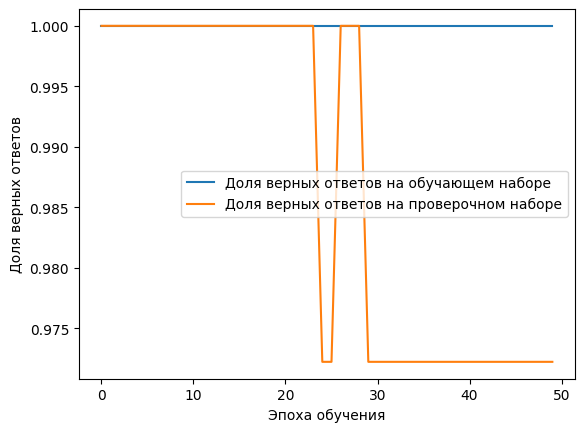

In [165]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')

# Визуализация точности на проверочной выборке
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')

# Отрисовка подписей осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')

# Отрисовка легенды
plt.legend()

# Вывод графика
plt.show()

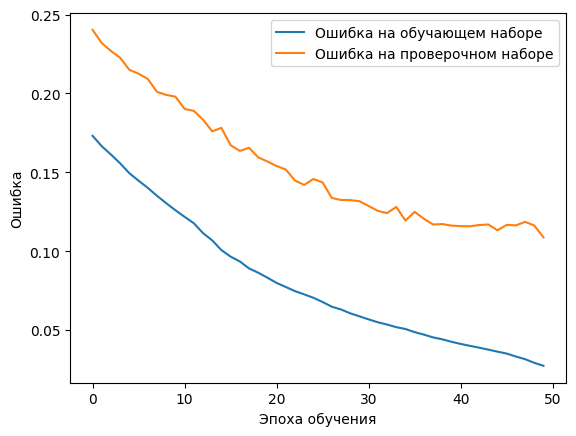

In [166]:
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')

plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')

plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')

plt.legend()

plt.show()

In [167]:
y_predict_train = model.predict(X_train)
y_predict_test = model.predict(X_test)

2/2 [==============================] - 0s 4ms/step


Accuracy: 0.98
Precision: 0.94
Recall: 1.00
F1 score: 0.97
Accuracy: 0.99
Precision: 0.96
Recall: 1.00
F1 score: 0.98


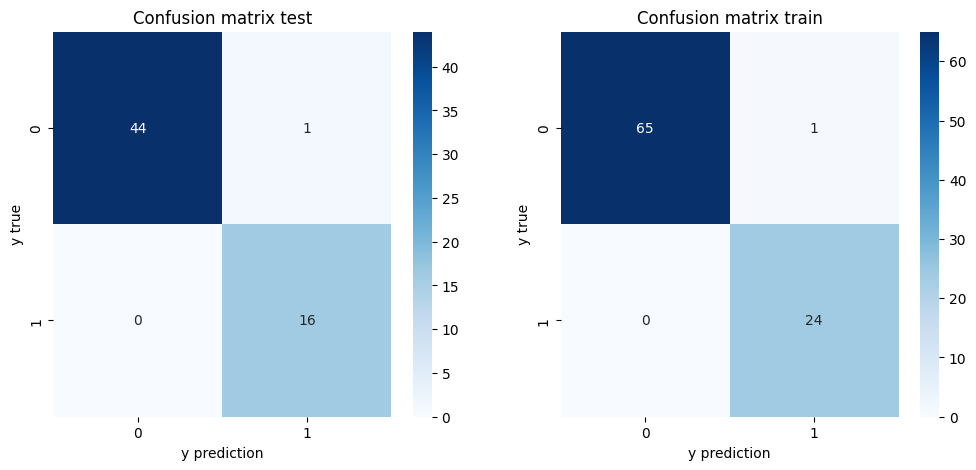

In [168]:
from sklearn import metrics
confusion_matrix_test = metrics.confusion_matrix(y_test, y_predict_test.round())
confusion_matrix_train = metrics.confusion_matrix(y_train, y_predict_train.round())

import seaborn as sns 
fig, axes = plt.subplots(1, 2, figsize=(12, 5)) #фигура + 2 координатные плоскости
#Строим тепловую карту для первой матрицы ошибок
sns.heatmap(confusion_matrix_test, annot=True, fmt='', ax=axes[0], cmap='Blues')
#Добавляем название графику и подписи осей абсцисс и ординат
axes[0].set_title('Confusion matrix test')
axes[0].set_xlabel('y prediction')
axes[0].set_ylabel('y true')
sns.heatmap(confusion_matrix_train, annot=True, fmt='', ax=axes[1], cmap='Blues')
axes[1].set_title('Confusion matrix train')
axes[1].set_xlabel('y prediction')
axes[1].set_ylabel('y true')

print('Accuracy: {:.2f}'.format(metrics.accuracy_score(y_test, y_predict_test.round())))
print('Precision: {:.2f}'.format(metrics.precision_score(y_test, y_predict_test.round())))
print('Recall: {:.2f}'.format(metrics.recall_score(y_test, y_predict_test.round())))
print('F1 score: {:.2f}'.format(metrics.f1_score(y_test, y_predict_test.round())))

print('Accuracy: {:.2f}'.format(metrics.accuracy_score(y_train, y_predict_train.round())))
#Рассчитываем precision
print('Precision: {:.2f}'.format(metrics.precision_score(y_train, y_predict_train.round())))
#Рассчитываем recall
print('Recall: {:.2f}'.format(metrics.recall_score(y_train, y_predict_train.round())))
#Рассчитываем F1-меру
print('F1 score: {:.2f}'.format(metrics.f1_score(y_train, y_predict_train.round())))






In [178]:
result_csv_predict = X_test


In [180]:
result_csv_predict['true_value'] = y_test

In [181]:
result_csv_predict['predicted'] = y_predict_test

In [182]:
result_csv_predict.head()

,Пол,Возраст,Опыт работы (месяц),полная занятость,частичная занятость,проектная работа,волонтёрство,стажировка,полный день,сменный график,...,Последняя/нынешняя должность_нет,"Последняя/нынешняя должность_филиал ПАО АНК «Башнефть» «Башнефть-Новойл""",Образование_бакалавр,Образование_высшее,Образование_магистр,Образование_неоконченноевысшее,Образование_среднее,Образование_среднееспециальное,predicted,true_value
2,0,28,52,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0.947857,1
51,0,24,40,1,1,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0.007032,0
62,0,25,51,1,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,0.018392,0
96,0,45,293,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0.007540,0
76,0,21,10,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0.920869,1
